Hola **Jairo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

## Introducciòn del Proyecto



Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo incluyendo la redacción de la introducción! Procura mantener esta práctica y hacerlo un poco más detallada en tus próximos proyectos ya que esto ayuda a entender el objetivo del proyecto
</div>

## Pre-procesar los datos

In [104]:
# importar librerias 
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import datetime as dt 
import matplotlib.pyplot as plt 

In [105]:
#Leer los datasets:

orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [106]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Son 9 Hypotesis para probar, pero no podemos probar todas, por eso debemos escoger cuales vamos a probar, de acuerdo a nuestro presupuesto y tiempo. Para definir esto, tenemos un Framework (metodologia para saber cual vamos a probar) 

In [107]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [108]:
hypotheses.duplicated().sum()

0

In [109]:
hypotheses.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [110]:
# declarar funcion para limpiar datos

def limpiar_datos(data):
    new_columns = []
    for columna in data.columns:
        columna_limpia = columna.lower()
        new_columns.append(columna_limpia)
    data.columns = new_columns

    return data.head()

In [111]:
limpiar_datos(hypotheses)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión inicial de tus datos y la transformación de los mismos, siempre es importante entender con lo que trabajarás!
</div>

## Parte 1: ICE

Para saber que Hipotesis vamos a probar es necesario usar la metodologia ICE (impact, Confidence, Ease). Entre > es el impacto puede generar mayores ventas. Confianza= que tan seguro estoy que mi experimiento va a probar la hipotesis. Esfuerzo = Puede ejecutarse esta prueba facilmente **** Our Goal: Tener un Experimiento con alto impacto y confianza y menor esfuerzo***

In [112]:
#Vamos a extraer la primea Hypothesis:

hypotheses.iloc[0,0]

'Add two new channels for attracting traffic. This will bring 30% more users'

In [113]:
# Vamos a seleccionar las Hypotesis que vamos a probar:

hypotheses['ICE'] = hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']

In [114]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000


In [115]:
# Vamos a Ordenarlo de mayor a menor (el ICE es bueno cuando es mayor)

hypotheses.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


Las hipotesis con mejores puntajes de ICE, Es decir mayor IMpacto, confianza y mejor esfuerzo son la 8 01 y la 7)

### RICE
Es un metodo que nos permite priorizar oportunidades, problemas o soluciones. Es más preciso que el ICE, ya que RICE mide el alcance. Se calcula = (Alcance* Impacto * Confiabilidad) / Esfuerzo

In [116]:
# Vamos a calcular es RICE:

hypotheses['RICE'] = hypotheses['reach']  * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']

In [117]:
hypotheses.sort_values(by='RICE', ascending=False, inplace=True)
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


#Cuando ordenamos por el RICE, nos damos cuenta que la hipotesis que tiene mayor alcance es la 7, seguida de las 2 y 0

#Escogeré las primeras 3 hipotesis para realizar el análisis

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! Te recomendaría presentar en gráfica para que sea más fácil realizar la comparación del cambio entre los dos frameworks
</div>

## Parte 2. Analisis del Test A/B

Vamos a escoger la Hipotesis numero 3, que está en la posición 5, ya que esta hipotesis tiene una diferencia que puede ser impactado en los dos grupo A / B (Si yo cambio la estructura del catalogo, los visitantes van a encontrar los productos mas rápido)

Vamos a asumir que el Grupo A=No hay cambio - B= Si hay un cambio de boton de categoria

In [118]:
hypotheses.iloc[5,0]

'Change the category structure. This will increase conversion since users will find the products they want more quickly'

### Datasets = Orders

In [119]:
#Vamos a analizar el dataframe: orders

orders = pd.read_csv('/datasets/orders_us.csv')

In [120]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [121]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [122]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [123]:
orders.duplicated().sum()

0

In [124]:
# Transformo tipo object a fecha:

orders['date'] = pd.to_datetime(orders['date'])
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [125]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


#Vamos a analizar si hay duplicados por visitors es decir si una visitante ingreso a la pagina mas de una vez en los dos grupos)

In [126]:
orders.duplicated(subset=['visitorId', 'group']).sum()

108

#Esto quiere decir que hay 108 visitantes que visitaron los dos grupos A y B

In [127]:
#Vamos a revisar si un mismo visitor estuvo en un mismo dia en los dos grupos: 

orders.duplicated(subset=['visitorId', 'group', 'date']).sum()

26

#26 personas visitaron el mismo dia los grupos A y B

### Datasets = visits (cantidad de veces que alguien entro a la página)

In [128]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [129]:
visits['date'] = pd.to_datetime(visits['date'])

In [130]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [131]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [132]:
# Sumar las visitas por grupo
visitas_por_grupo = visits.groupby('group')['visits'].sum()

print(visitas_por_grupo)

group
A    18736
B    18916
Name: visits, dtype: int64


El grupo B es el que ha tenido mayores visitas en la pagina

In [133]:
#Vamos a revisar las fechas de las ordenes, en las que los grupos visitaron las paginas

groups_by_dates = orders[['date', 'group']].drop_duplicates().sort_values(by='date')
groups_by_dates

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A
...,...,...
497,2019-08-29,A
690,2019-08-30,B
730,2019-08-30,A
930,2019-08-31,B


In [134]:
# Ahora agruparemos los grupos por fecha, para conocer cuantas facturas, visitantes y ventas se realizaron por grupo

In [135]:
#Vamos a revisar si el mismo usuario estuvo en cada grupo

orders.groupby(['visitorId'])['group'].nunique().sort_values(ascending=False)

visitorId
2654030115    2
3891541246    2
3941795274    2
1404934699    2
351125977     2
             ..
1476256851    1
1476741193    1
1484903144    1
1485964287    1
4283872382    1
Name: group, Length: 1031, dtype: int64

#La tabla anterior significa que hay visitantes que pertenecen a solo un grupo o a los dos

In [136]:
#Ahora vamos a investigar si los visitantes entraron el mismo día a los dos grupos

visitors_with_two_groups =orders.groupby(['visitorId', 'date'])['group'].nunique().sort_values(ascending=False).reset_index().query('group>1')
visitors_with_two_groups

,visitorId,date,group
0,2587333274,2019-08-08,2
1,477780734,2019-08-30,2
2,2579882178,2019-08-18,2
3,2038680547,2019-08-04,2
4,1316129916,2019-08-27,2
5,232979603,2019-08-31,2
6,3891541246,2019-08-04,2
7,1801183820,2019-08-05,2
8,3062433592,2019-08-12,2
9,1230306981,2019-08-09,2


#Hay 22 usuarios que entraron el mismo dia a los dos grupos en la pagina web, por lo cual se toma la decision de eliminarlos ya que nos dañan el analisis

In [137]:
visitors_with_two_groups['visitorId']

0     2587333274
1      477780734
2     2579882178
3     2038680547
4     1316129916
5      232979603
6     3891541246
7     1801183820
8     3062433592
9     1230306981
10     237748145
11    3951559397
12    2949041841
13    3963646447
14    2378935119
15    4266935830
16    2686716486
17    3202540741
18    1614305549
19    3717692402
20    2458001652
21    4256040402
22    3766097110
Name: visitorId, dtype: int64

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para un mejor orden todo este proceso de exploración te recomendaría realizarlo antes de pasar a la parte del cálculo con los frameworks
</div>

## Analiza el test A/B:


### Ingreso Acumulado por grupo

In [138]:
# matriz con valores unicos

dates_groups = orders[['date', 'group']].drop_duplicates()

In [139]:
# aplicar metodos a cada grupo, ordenar los resultados por columnas date y group 

orders_agg = dates_groups.apply(
    
        lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], 
                       orders['group']== x['group'])
    ].agg({
        'date':'max',
        'group':'max',
        'transactionId':pd.Series.nunique,
        'visitorId':pd.Series.nunique,
        'revenue':'sum'
    }),
    axis=1
).sort_values(by=['date','group'])

In [140]:
orders_agg

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


In [141]:
# visitantes que ingresaron a la pagina por grupo

visits_agg = dates_groups.apply(
    lambda x: visits[
        np.logical_and(visits['date'] <= x['date'], visits['group']== x['group'])
    ].agg({
        'date':'max',
        'group':'max',
        'visits':'sum'
    }),
    axis=1
).sort_values(by=['date','group'])

In [142]:
visits_agg

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [143]:
#Realizaremos una columna de hechos:Fusionando las dos tablas anteriores:

fct_experiment = orders_agg.merge(visits_agg, on=['date', 'group'], how='outer')

In [144]:
fct_experiment 

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [145]:
#Se modifica el nombre de las columnas:

fct_experiment.columns = ['date', 'group', 'orders', 'buyers', 'total_sales', 'number_visits']
fct_experiment

,date,group,orders,buyers,total_sales,number_visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [146]:
# Vamos a filtrar por el grupo A

sales_group_a = fct_experiment.query('group == "A"') [['date', 'total_sales', 'orders']]
sales_group_a 

,date,total_sales,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109
10,2019-08-06,9600.0,127
12,2019-08-07,11842.9,145
14,2019-08-08,13373.3,161
16,2019-08-09,16320.4,177
18,2019-08-10,19608.6,193


In [147]:
sales_group_b = fct_experiment.query('group == "B"') [['date', 'total_sales', 'orders']]
sales_group_b 

,date,total_sales,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101
11,2019-08-06,13069.3,129
13,2019-08-07,16600.8,153
15,2019-08-08,20088.6,180
17,2019-08-09,22646.7,205
19,2019-08-10,24367.1,228


### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas

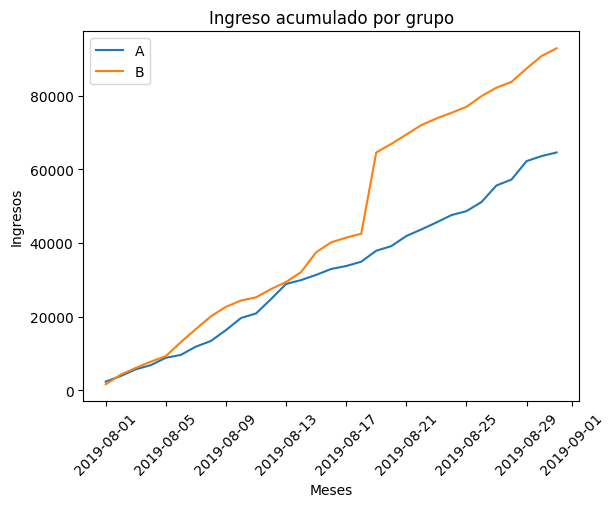

In [148]:
# Creamos los gráficos

plt.plot(sales_group_a['date'], sales_group_a ['total_sales'], label='A')
plt.plot(sales_group_b['date'], sales_group_b ['total_sales'], label='B')

plt.title('Ingreso acumulado por grupo')
plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.legend()
plt.xticks(rotation=45)
plt.show()

En la tabla anterior se puede observar las ventas totales por fecha y por grupo A y B. En los primeros meses las ventas tuvieron la misma tendencia, sin embargo, el grupo B tiene un pico màs alto en ventas, especialmente en Agosto del 2019. Pudo ser una campaña de mercadeo que se lanzo para ese mes e incremento las ventas 

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. 

In [149]:
sales_group_a['total_sales'].mean()

32062.16451612903

In [150]:
sales_group_b['total_sales'].mean()

45708.03225806452

Se puede inferir con este analisis que efectivamente las ventas del grupo B en promedio son mas altas que el grupo A. 

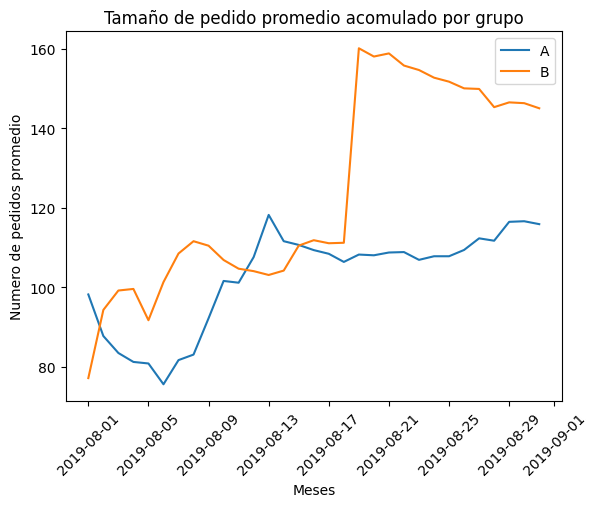

In [151]:
plt.plot(sales_group_a['date'], sales_group_a['total_sales'] / sales_group_a['orders'], label='A')
plt.plot(sales_group_b['date'], sales_group_b['total_sales'] / sales_group_b['orders'], label='B')

plt.title('Tamaño de pedido promedio acomulado por grupo')
plt.xlabel('Meses')
plt.ylabel('Numero de pedidos promedio')
plt.legend()
plt.xticks(rotation=45)

plt.show()

En este grafico los pedidos promedios del Grupo A tienen una tendencia a la baja en los primeras semanas del experimento, sin embargo en la semana del 2019-08-9 al 2019-08-13 se observa una alza, despues de ello se mantiene, por otra parte el Grupo B, tiene un mejor desempeño en el numero de pedidos, sin embargo en la semana donde el Grupo A tuvo un aumento considerable el Grupo B disminuye el numero de pedidos, lo que podria significar que la estrategia de marketing fue mas efectiva para esa semana, sin embargo despues en la semana del 2019-08-17 nuevamente el Grupo B tiene un mejor desempeño y aumenta exponencialmente, como se observó en el grafico anterior.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente y redactaste una buena conclusión a partir de ella
</div>

### Diferencia relativa en el tamaño de pedido promedio acomulado del grupo B comparado con el grupo A

In [152]:
# unir los datos en un DF
relativa_acomulada = sales_group_a.merge(sales_group_b, left_on='date', right_on='date', how='left', suffixes=['A','B'])
relativa_acomulada

,date,total_salesA,ordersA,total_salesB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101
5,2019-08-06,9600.0,127,13069.3,129
6,2019-08-07,11842.9,145,16600.8,153
7,2019-08-08,13373.3,161,20088.6,180
8,2019-08-09,16320.4,177,22646.7,205
9,2019-08-10,19608.6,193,24367.1,228


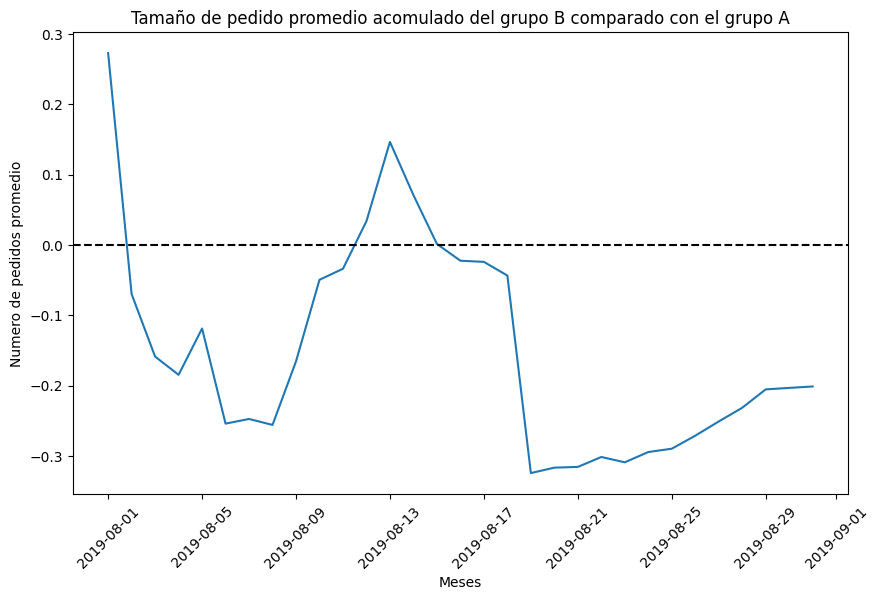

In [153]:
# Cuanto representa la venta promedio por order de mi Grupo B comparado con el grupo A

plt.figure(figsize=(10,6))
plt.plot(
    relativa_acomulada['date'], 
    (relativa_acomulada['total_salesA'] / relativa_acomulada['ordersA']) / 
    (relativa_acomulada['total_salesB'] / relativa_acomulada['ordersB'])
        -1 )
plt.title('Tamaño de pedido promedio acomulado del grupo B comparado con el grupo A')
plt.xlabel('Meses')
plt.ylabel('Numero de pedidos promedio')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Este grafico se relaciona con la infromación obtenida en los graficos anteriores, en donde el Grupo B lidera entre el 9 y 13 de agosto y se puede concluir que la venta promedio por order de mi Grupo B comparado con el grupo A, es 200% mayor, por lo tanto la compañia lanzo una campaña de marketing para esa fecha y dio muy buen resultado. La linea cero indica que el se vendio lo mismo que la venta promedio por orden es igual en el grupo A y B. Sin embargo el grupo B lidera la venta.

### Tasa de conversión de cada grupo

In [154]:
# calcular la conversion acomulada : Relacion entre las ordenes y los visitas

fct_experiment ['conversion'] = fct_experiment['orders'] / fct_experiment['number_visits']
fct_experiment 

,date,group,orders,buyers,total_sales,number_visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,0.033657
58,2019-08-30,A,545,493,63563.5,18037,0.030216
59,2019-08-30,B,620,567,90736.3,18198,0.034070
60,2019-08-31,A,557,503,64554.9,18736,0.029729


#La conversion es lo que yo gasto en publicidad comparado con el numero de ordenes que se tienen en la empresa (regularmente siempre es baja)

In [155]:
# filtrar por grupo A y B 

experimient_A = fct_experiment[fct_experiment['group']=='A']

experimient_B = fct_experiment[fct_experiment['group']=='B']

In [156]:
experimient_A

,date,group,orders,buyers,total_sales,number_visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
2,2019-08-02,A,44,38,3860.3,1338,0.032885
4,2019-08-03,A,68,62,5675.5,1845,0.036856
6,2019-08-04,A,84,77,6822.1,2562,0.032787
8,2019-08-05,A,109,100,8810.2,3318,0.032851
10,2019-08-06,A,127,114,9600.0,3985,0.031870
12,2019-08-07,A,145,131,11842.9,4629,0.031324
14,2019-08-08,A,161,146,13373.3,5239,0.030731
16,2019-08-09,A,177,159,16320.4,5856,0.030225
18,2019-08-10,A,193,175,19608.6,6262,0.030821


In [157]:
experimient_B

,date,group,orders,buyers,total_sales,number_visits,conversion
1,2019-08-01,B,21,20,1620.0,713,0.029453
3,2019-08-02,B,45,43,4243.8,1294,0.034776
5,2019-08-03,B,61,59,6050.6,1803,0.033833
7,2019-08-04,B,78,75,7767.9,2573,0.030315
9,2019-08-05,B,101,98,9262.9,3280,0.030793
11,2019-08-06,B,129,123,13069.3,3935,0.032783
13,2019-08-07,B,153,146,16600.8,4644,0.032946
15,2019-08-08,B,180,171,20088.6,5298,0.033975
17,2019-08-09,B,205,193,22646.7,5908,0.034699
19,2019-08-10,B,228,215,24367.1,6277,0.036323


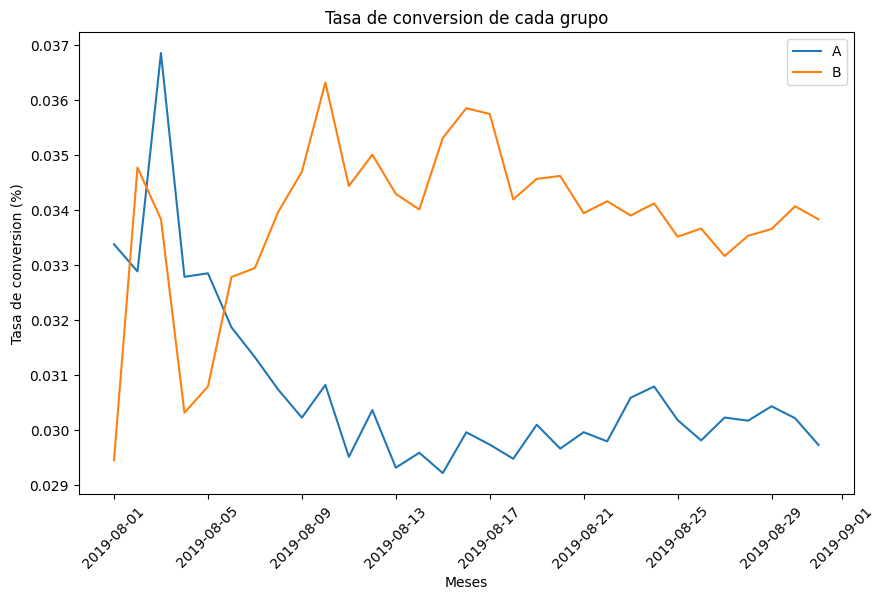

In [158]:
# trazar graficos 

plt.figure(figsize=(10,6))
plt.plot(experimient_A['date'], experimient_A['conversion'], label='A')
plt.plot(experimient_B['date'], experimient_B['conversion'], label='B')

plt.title('Tasa de conversion de cada grupo')
plt.xlabel('Meses')
plt.ylabel('Tasa de conversion (%)')
plt.legend()
plt.xticks(rotation=45)

plt.show()

En el grafico anterior, podemos ver como la conversion en el tiempo ha cambiado. El grupo A la conversión más alta fue el 1 de agosto y el grupo B fue el 9 de agosto. Sin embargo los picos más altos han sido del grupo B

In [159]:
# Ahora vamos a analizar como se compara la conversion del Grupo A con el Grupo B 

union_conversion_groups = experimient_A[['date','conversion']].merge(
    experimient_B[['date','conversion']],
    left_on='date', 
    right_on='date',
    suffixes=['A','B']
)

In [160]:
union_conversion_groups

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793
5,2019-08-06,0.031870,0.032783
6,2019-08-07,0.031324,0.032946
7,2019-08-08,0.030731,0.033975
8,2019-08-09,0.030225,0.034699
9,2019-08-10,0.030821,0.036323


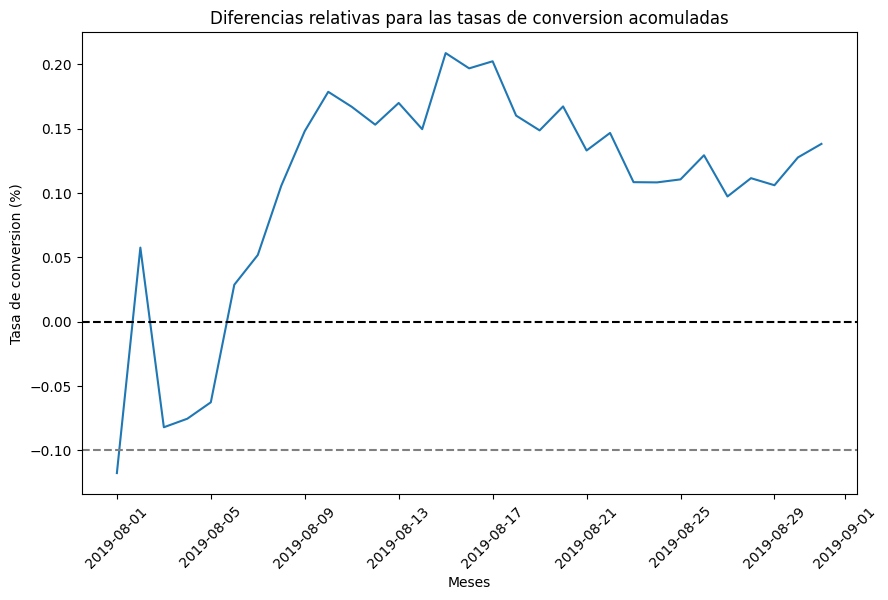

In [161]:
# trazar grafico 
plt.figure(figsize=(10,6))

plt.plot(
    union_conversion_groups['date'],
    union_conversion_groups['conversionB'] 
    / union_conversion_groups['conversionA']
    -1)
plt.xticks(rotation=45)

plt.title('Diferencias relativas para las tasas de conversion acomuladas')
plt.xlabel('Meses')
plt.ylabel('Tasa de conversion (%)')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='gray', linestyle='--')

plt.show()

En la grafica anterior, se puede dar cuenta como el Grupo B excede la conversion del grupo A 

### Grafico de dispersión del número de pedidos por usuario

#Es necesario detectar las anomalias, ya que esto me permite detectar los mejores clientes, ordenes fraudulentas, peores clientes 

In [162]:
orders_users = orders.groupby('visitorId').size().reset_index(name='order_count')
orders_users

,visitorId,order_count
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [163]:
#Modificamos las columnas:

orders_users.columns = ['userId', 'orders']
orders_users.sort_values(ascending=False, by ='orders')

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


#Se puede identificar que el usuario con mayor ordenes es el: 4256040402 y el 2458001652

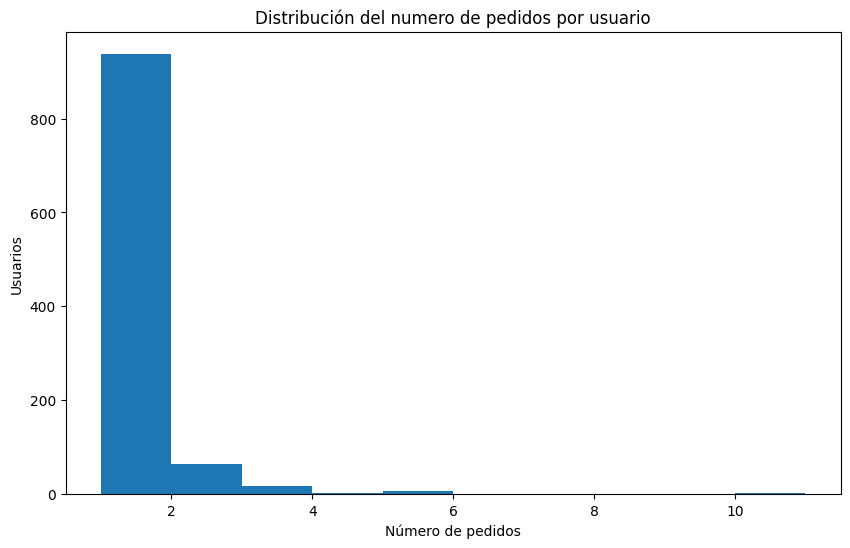

In [164]:
# Histograma de la distribucion de el numero de pedidos por usuario

plt.figure(figsize=(10,6))

plt.hist(orders_users['orders'])

plt.title('Distribución del numero de pedidos por usuario')
plt.xlabel('Número de pedidos')
plt.ylabel('Usuarios')
plt.show()

En esta grafica se puede ver la distribución de las ordenes por usuario, en donde aproximadamente 900 usuarios realizan entre 0 y 2 ordenes, y mas o menos 80 usuarios realizan mayor a 2 ordenes

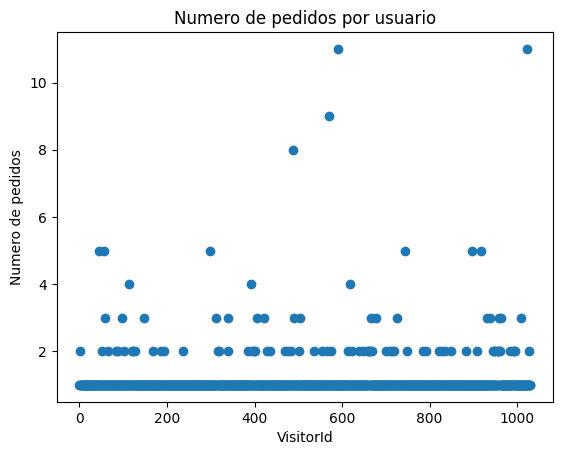

In [165]:
# crear grafico de dispersion

x_values = pd.Series(range(0, len (orders_users)))

plt.scatter(x_values, orders_users['orders'])
plt.title('Numero de pedidos por usuario')
plt.xlabel('VisitorId')
plt.ylabel('Numero de pedidos')

plt.show()

En la grafica anterior, podemos identificar que la mayoria de usuarios realizan 1 orden, seguido de 2 ordenes. Aunque hay usuarios que tienen mas de 4 ordenes 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones y conclusiones desde las mismas, se pueden ver de manera correcta las diferencias entre grupos
</div>

### Calculo de percentiles del numero de pedidos por usuario

In [166]:
# Vamos analizar los percentiles

print(np.percentile(orders_users['orders'], [90,95,99,100]))

[ 1.  2.  4. 11.]


Esto quiere decir que en porcentaje, el 90% de los usuarios realizan 1 orden, del 90% al 95% realizan 2, el 99% realizan 4 y hay valores atipicos o anormales que realizan 11 ordenes

### Grafico de dispersion de los precios de los pedidos

In [167]:
# Grafico de dispersion de los precios de los pedidos

xvalues = pd.Series(range(0, len(orders['revenue'])))
xvalues

0          0
1          1
2          2
3          3
4          4
        ... 
1192    1192
1193    1193
1194    1194
1195    1195
1196    1196
Length: 1197, dtype: int64

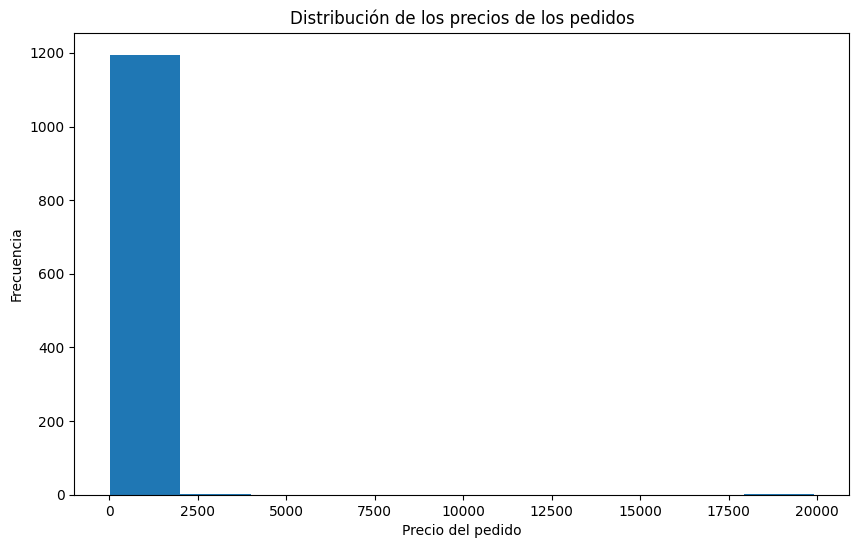

In [168]:
# investigar la distribucion de los precios de los pedidos 

plt.figure(figsize=(10,6))
plt.hist(orders['revenue'])

plt.title('Distribución de los precios de los pedidos')
plt.xlabel('Precio del pedido')
plt.ylabel('Frecuencia')
plt.show()

La gran mayoría de los pedidos tiene precios bajos (cercanos a 0 o dentro de un rango pequeño, probablemente menor a 2,500).
Hay pocos o ningún pedido con precios superiores a aproximadamente 2,500, lo que hace que el resto del eje X esté casi vacío.
Es posible que haya valores atípicos (outliers) con precios muy altos, lo que extiende el rango del eje X hasta 20,000, pero estos tienen frecuencias extremadamente bajas. Los precios de los pedidos son bajos,esto podría deberse a descuentos, productos económicos, o clientes con presupuestos bajos

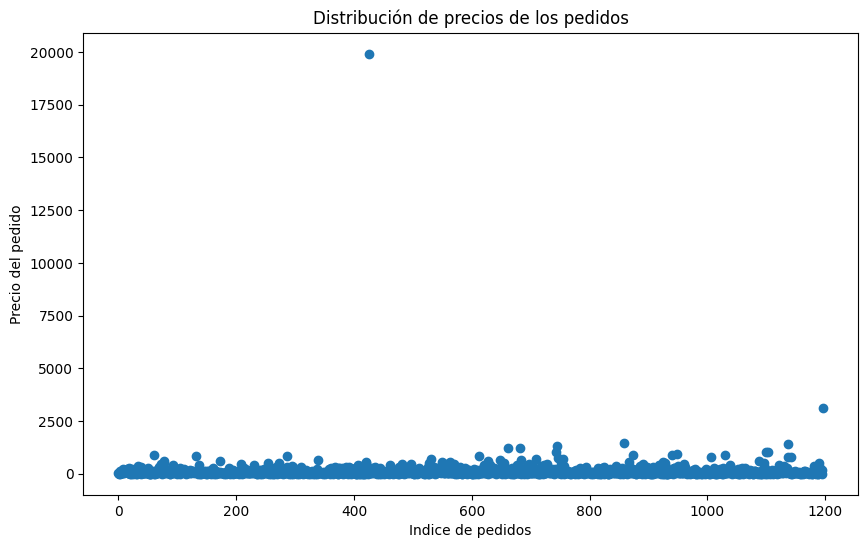

In [169]:
# grafico de dispersion

plt.figure(figsize=(10,6))
plt.scatter(xvalues, orders['revenue'])

plt.title('Distribución de precios de los pedidos')
plt.ylabel('Precio del pedido')
plt.xlabel('Indice de pedidos')

plt.show()

·Tal y como vimos en la tabla anteior, La gran mayoría de los pedidos tienen precios muy bajos, lo que puede sugerir que la empresa tiene productos estándar con precios constantes bajos. 

### Calcular percentiles de los precios de pedidos

In [170]:
print(np.percentile(orders['revenue'], [90,95,99,100]))

[  282.48    435.54    900.904 19920.4  ]


Al realizar el calculo de los percentiles se puede concluir que el 90% de los usuarios ordenan productos con un costo de 282.48, el 5 por ciento de los usuarios ordenan productos con un valor de 435.54 y un 1% piden productos con unn valor de $900.904. Por ultimo hay un usuario que pidio productos con un valor de 19920.4. Este usuario y los del 1% podrian ser considerados para recibir alguna recompensa.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores anómalos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

### Significancia estadística de la diferencia en la conversion entre los grupos con datos brutos

In [171]:
# crear variables con las ordenes por usuario de acuerdo al grupo

ordersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
# renombrar las columnas 
ordersA.columns= ['userId', 'orders']

In [172]:
ordersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [173]:
ordersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
# renombrar las columnas 
ordersB.columns= ['userId', 'orders']

In [174]:
ordersB 

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [175]:
# crear variables Sample para crear una series con puntaje 0 si es que no tuvieron pedidos, necesario para la prueba
# U de Mann

sampleA = pd.concat(
    [
        ordersA['orders'],
        pd.Series(0,
                  index=np.arange(visits[visits['group'] =='A']['visits'].sum() - len(ordersA['orders'])),
                  name='orders'
                 )
    ],
    axis=0
)

In [176]:
sampleB = pd.concat(
    [
        ordersB['orders'],
        pd.Series(0,
                  index=np.arange(visits[visits['group'] =='B']['visits'].sum() - len(ordersB['orders'])),
                  name='orders'
                 )
    ],
    axis=0
)

In [177]:
# imprimir la ganancia relativa de conversion

print("P-valor: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Ganancia relativa en la conversión: {0:.3f}".format(sampleB.mean() / sampleA.mean()-1))

P-valor: 0.017
Ganancia relativa en la conversión: 0.138


Al realizar la prueba U de Mann se obtuvo que el valor p es de 0.017 lo que es menor que un alpha de 0.05 lo que indica que hay una diferencia significativa en las distribuciones de las conversiones entre los Grupos A y B. Por otra parte se obtuvo un valor de 0.138 lo que indica que el grupo B tuvo aproximadamente un 13.8% de mayor ganancia en la tasa de conversion sobre el Grupo A. Por lo anterior, la estrategia de marketing del Grupo B tiene mejores resultados, como se observo en los graficos anteriores

###  Significancia estadistica de la diferencia en el tamaño promedio de pedidos entre los grupos utilizando datos en bruto

In [178]:
print('P-valor: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))

print('Ganancia relativa en el tamaño promedio de pedidos: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1))

P-valor: 0.692
Ganancia relativa en el tamaño promedio de pedidos: 0.252


Sin embargo al realizar la prueba U de Mann para el tamaño promedio de pedidos, se encontro que el valor p de 0.692 es mucho mayor a un alpha de 0.05, por lo cual no se podria rechazar la hipotesis nula, lo que indica que no hay una diferencia significativa en el tamaño de pedidos promedio de ambos grupos.
Por otra parte se obtuvo un valor de 0.252 o 25.2% mayor de tamaño promedio del Grupo B que el Grupo A sin embargo con el resultado del valor p, indica que esta diferencia podria deberse al azar ya que no es estadisticamente significativa

<div class="alert alert-block alert-warning">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo aplicando las pruebas de hipótesis con los datos sin filtrar, veamos como resulta la misma prueba con los datos filtrados. Te recomiendo que aproveches más los strings formateados agregando texto que describa el valor que vas a mostrar, así es más fácil entender lo que quieres comunicar con esos números
</div>

### Significancia estadistica de la diferencia en la conversion entre los grupos usando datos filtrados

In [179]:
# encontar el numero de usuarios con valores atipicos

usersManyOrders = pd.concat(
    [
        ordersA[ordersA['orders'] > 2]['userId'], 
        ordersB[ordersB['orders'] > 2]['userId']
    ], 
    axis = 0
)

usersSpentOrders = orders[orders['revenue'] > 436]['visitorId']

abnormalUsers = pd.concat(
    [usersManyOrders, usersSpentOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head())
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(73,)


In [180]:
# filtrar los datos anomalos Grupo A

sampleAFiltro = pd.concat(
    [
        ordersA[np.logical_not(ordersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersA[np.logical_not(ordersA['userId'].isin(abnormalUsers))]['orders'])),
            name='orders'
        )
    ],
    axis=0
)

In [181]:
# filtro de datos Grupo B
sampleBFiltro = pd.concat(
    [
        ordersB[np.logical_not(ordersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersB[np.logical_not(ordersB['userId'].isin(abnormalUsers))]['orders'])),
            name='orders'
        )
    ],
    axis=0
)

In [182]:
# aplicar la prueba U de Mann 
print("P-valor: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltro, sampleBFiltro)[1]))
print("Ganancia relativa en la conversión: {0:.3f}".format(sampleBFiltro.mean() / sampleAFiltro.mean()))

P-valor: 0.014
Ganancia relativa en la conversión: 1.170


Al calcular la significancia estadistica de la conversion entre grupos pero usando datos filtrados se encontro que el valor p tuvo un valor de 0.014 lo que es menor a un alpha de 0.05 lo que indica que existen diferencias significativas en la conversion entre el Grupo A y el grupo B, por otra parte se obtuvo un valor de 1.170 o 17% mayor de ganancia relativa en la conversion del Grupo B que del Grupo A, esto da como resultado que el Grupo B mostro un mayor desempeño en la tasa conversion con los datos filtrados.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando datos filtrados

In [183]:
# Mostrar el valor p calculado con la prueba U de Mann

print("P-valor:  {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
)[1]))

P-valor:  0.744


In [184]:
# Mostrar la diferencia relativa en el ingreso promedio entre A y B

print("Diferencia relativa en el tamaño promedio del pedido: {0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
    orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1 ))

Diferencia relativa en el tamaño promedio del pedido: -0.028


Por ultimo al calcular la significancia del tamaño promedio de pedidos se obtuvo un valor p de 0.744 lo cual es mayor a un alpha de 0.05 lo que indica que no existe una diferencia estadisticamente significativa, lo cual podria indicar que la diferencia se deba al azar. Por otra parte la diferencia relativa es de -0.028 o -2.8% lo que indica que los pedidos en el Grupo B son aproximadamente 2.8% menor que en el grupo A. Lo que puede sugerir que un cambio evaluado no afecta significativamente el tamaño promedio de los pedidos en estos grupos.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada la prueba de hipótesis con los datos filtrados!
</div>

### Tomar una decision basada en los resultados de la prueba


Basándome en los resultados obtenidos de las pruebas y en la observación, el Grupo B muestra una ventaja significativa en la tasa de conversion teniendo un 17% más en comparación del Grupo A, el Grupo B podría ser una opcion solida para elegirlo como líder. Sin embargo en el tamaño promedio de pedido, no se observa una diferencia significativa entre los grupos ya que el Grupo B tiene un 2.8% menos comparado con el Grupo A. Esto podria ser una señal para extender los experimentos y evaluar si el Grupo B puede mejorar en ese aspecto.
Por lo tanto elegiria la opcion 3: Continuar con la prueba, esto podría ayudar a identificar si el Grupo B consolida su desempeño en ambas métricas (conversión y tamaño de pedido)

<div class="alert alert-block alert-warning">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Sólo una cosa cómo recomendación para tus próximos proyectos sobre la presentación en los resultados de la prueba de hipótesis, a menudo tendrás que compartir tus proyectos con otros miembros de tu equipo por lo que la presentación es importante y es mejor que utilices las capacidades de los strings formateados para mostrar mensajes claros del valor que se está mostrando. Así mismo para seguir buenas prácticas es mejor que no tengas líneas tan largas en el mismo string sino que cada parte del cálculo lo dividas en variables hasta llegar al resultado.
    
Saludos!
</div>